# User Knowledge Data Analysis Project 

**Group Members: Tanvi Singh, Xinyao Zhou, Lauren Kufske, Lea Liang**

### —Introduction—

The key to being the most successful student is to not only have a deep understanding of the taught content but what is equally important to being successful in life is being an efficient student. 
An article written by Craig S. Galbraith and Gregory B. Merril titled: Academic performance and burnout: an efficient frontier analysis of resource use efficiency among employed university students came to the conclusion that student efficiency has great impacts on physical, psychological, and emotional health. The connection is simple; the more efficient a student is in their studies the more time they have to spend on other components of their life that benefit them. This could take the form of more time for exercise, community connection activities, more time to prepare balanced meals, more quality time spent with family and friends or even more time to pick up shifts at work which may relieve financial stressors (Galbraith et al. 2012). 

In this data analysis our team discovers the key to efficiency by determining what the two most important aspects of education are in order to obtain a high knowledge score of a primary subject. In this case, we used a data set that describes 5 variables that may be used as an indicator of a students' knowledge surrounding the primary subject of Electrical DC Machines. After determining the two variables that have the strongest relationship to knowledge score, we used those variables to determine the knowledge score of a student using classification techniques using the previously determined most impactful variables. As a whole, our research question was; How can we determine the knowledge level of a user based on the most appropriate variables from the data set? We will determine what are the specific variables that are the more appropriate to use for this classification task using the data analysis techniques outlined in the methods section. 

The data set used for the project was sourced from the UCI Machine Learning Repository. The chosen data set is the User Knowledge Modeling Data Set. This data set was created by Hamdi Tolga Kahraman of Karadeniz Technical University, Ilhami Colak and Seref Sagiroglu of Gazi University for their Ph.D. Thesis. Kahraman, Colak and Sagiroglu have provided the data set in an excel sheet format and pre-split the data into two data frames, one is the training data and the other is the testing data. This dataset is multivariate with 5 total columns as described below, The first four columns have been standardized to decimal values and the class distributions for the user intelligence column (UNS) include: very_low, low, middle, and high. 

#### Identifying and Describing our chosen data set:

The data set that this project will be centered around is the User Knowledge Modeling Data Set sourced from UCI Machine Learning Repository. This dataset is multivariate and has been divided into a training set and test set. There are 5 columns: 

- **STG** (The degree of study time for goal object materials)

- **SCG** (The degree of repetition number of user for goal object materials)

- **STR** (The degree of study time of user for related objects with goal object)

- **LPR** (The exam performance of user for related objects with goal object)

- **PEG** (The exam performance of user for goal objects)

- **UNS** (The knowledge level of user)

The data set includes variables listed in the table below such as; the amount of time a student spent studying the primary subject, time spent studying other subjects that relate to the primary subject (for example this could be math courses, physics courses etc.), as well as exam scores in those subjects. These are a few of the 5 variables that are included that may provide an indication of a student’s knowledge of the primary subject.

### —Preliminary and Exploratory Data Analysis—

For our exploratory data analysis, we first need to load the necessary packages.

In [2]:
library(tidyverse)
library(tidymodels)
library(repr)
library(dplyr)
library(ggplot2)
library(readxl)
library(GGally)
library(cowplot)
set.seed(1000)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

Our chosen data set is an excel file taken from the internet, so we first need to read the data directly from the web, using the download.file() function in R. This is done by including the file address of the excel spreadsheet from the website, and then using destfile to specify where we want the file to be in the repository, by naming it suitably. 

Then, once the excel file is downloaded, and available remotely, we then want to read the file into R by using the read_excel() function. 

In [3]:
#use download.file() to download excel file directly from the web
download_userknowledge <- download.file("https://archive.ics.uci.edu/ml/machine-learning-databases/00257/Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.xls", destfile = "userknowledge.xls")
#read the excel file into R
userknowledge <- read_excel("userknowledge.xls")
userknowledge

New names:
* `` -> ...2



Data Set Characteristics: Multivariate,...2,Attribute Information:
<chr>,<lgl>,<chr>
Number of Instances: 403,NA,"STG (The degree of study time for goal object materails),"
Area: Education,NA,SCG (The degree of repetition number of user for goal object materails)
Attribute Characteristics: Real,NA,STR (The degree of study time of user for related objects with goal object)
Number of Attributes: 5,NA,LPR (The exam performance of user for related objects with goal object)
Associated Tasks: Classification,NA,PEG (The exam performance of user for goal objects)
NA,NA,UNS (The knowledge level of user)
Class Distribution,NA,NA
Very Low: 50,NA,NA
Low:129,NA,NA


As seen above, the file downloaded from the internet contains more than one sheet, and the first sheet does not include any necessary data for our data analysis. This data has been pre-split into training data and testing data, both of which are present in the second and third sheets of the spreadsheet, respectively. 

We will read the training and testing data in a similiar way as the "userknowledge.xls" file, using read_excel(). An additional step that we will take to ensure our dataset is tidy, is to make sure we are only selecting the necessary columns required for the data analysis, by using the select() function. 

In [4]:
#read the training data
userknowledge_training <- read_excel("userknowledge.xls", sheet = 2, col_names = TRUE) %>%
select(STG:UNS)
head(userknowledge_training, 10)

New names:
* `` -> ...7
* `` -> ...8



STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
0.10,0.10,0.15,0.65,0.30,Middle
0.08,0.08,0.08,0.98,0.24,Low
0.09,0.15,0.40,0.10,0.66,Middle
0.10,0.10,0.43,0.29,0.56,Middle
0.15,0.02,0.34,0.40,0.01,very_low
0.20,0.14,0.35,0.72,0.25,Low


In [5]:
#read the testing data
userknowledge_testing <- read_excel("userknowledge.xls", sheet = 3, col_names = TRUE) %>%
select(STG:UNS)
head(userknowledge_testing,10)

New names:
* `` -> ...7
* `` -> ...8



STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.00,0.10,0.50,0.26,0.05,Very Low
0.05,0.05,0.55,0.60,0.14,Low
0.08,0.18,0.63,0.60,0.85,High
0.20,0.20,0.68,0.67,0.85,High
0.22,0.22,0.90,0.30,0.90,High
0.14,0.14,0.70,0.50,0.30,Low
0.16,0.16,0.80,0.50,0.50,Middle
0.12,0.12,0.75,0.68,0.15,Low
0.20,0.20,0.88,0.77,0.80,High


In [22]:
#calculate the number of students by different UNS in training data
n_by_UNS_training <- group_by(userknowledge_training, UNS) %>%
summarize(number_of_entries = n())
n_by_UNS_training

`summarise()` ungrouping output (override with `.groups` argument)



UNS,number_of_entries
<chr>,<int>
High,63
Low,83
Middle,88
very_low,24


In [23]:
#calculate the number of students by different UNS in testing data
n_by_UNS_testing <- group_by(userknowledge_testing, UNS) %>%
summarize(number_of_entries = n())
n_by_UNS_testing

`summarise()` ungrouping output (override with `.groups` argument)



UNS,number_of_entries
<chr>,<int>
High,39
Low,46
Middle,34
Very Low,26


We first created a scatterplot finding the correlation between two random variables, colouring in the "knowledge level" variable, to see if there was any kind of relationship between the two. 

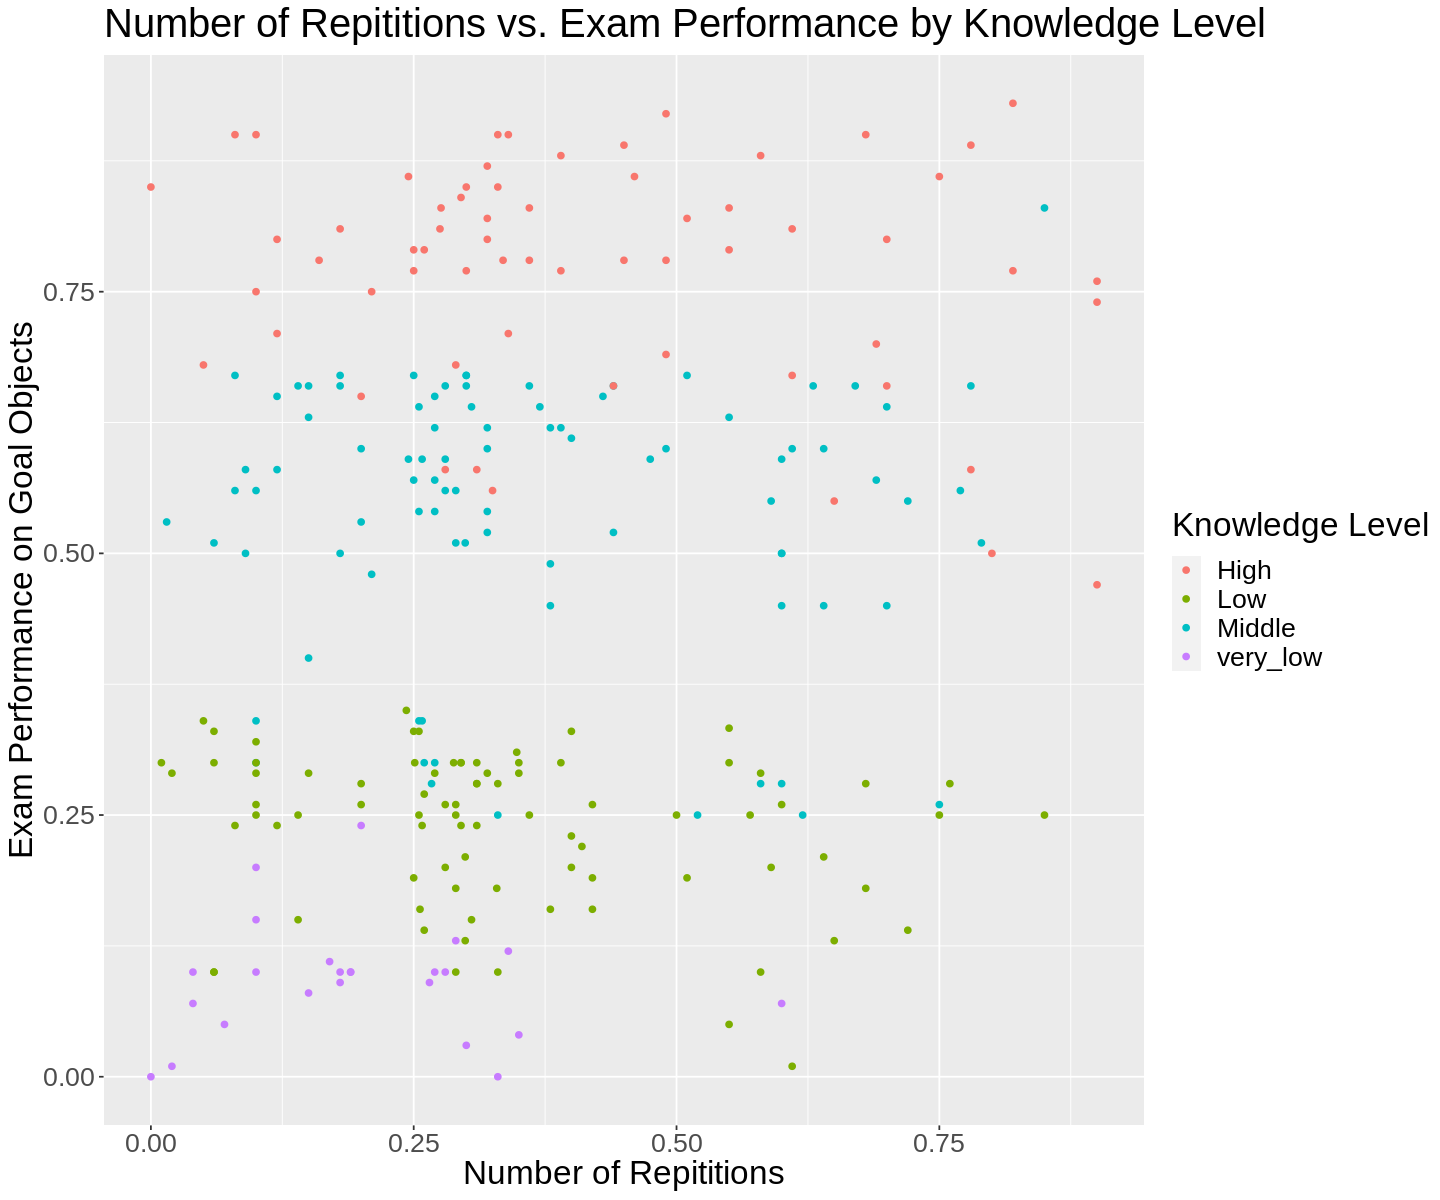

In [24]:
#make a scatter plot with SCG and PEG
options(repr.plot.width = 12, repr.plot.height = 10)

userknowledge_plot <- ggplot(userknowledge_training, aes(x = SCG, y = PEG, color = UNS)) +
    geom_point() +
    labs(x = "Number of Repititions", y = "Exam Performance on Goal Objects", color = "Knowledge Level") +
    ggtitle("Number of Repititions vs. Exam Performance by Knowledge Level") +
    theme(text = element_text(size = 20))

userknowledge_plot

We then proceeded to create a summary of our table of values, grouping by the "knowledge level" variable. We found the mean values for all of the quantitative variables. 

In [25]:
#find the mean of STG, SCG, STR, LPR, PEG with different UNS.
mean_know_level <- group_by(userknowledge_training, UNS) %>%
summarize(avg_STG = mean(STG, na.rm = TRUE),
         avg_SCG = mean(SCG, na.rm = TRUE),
         avg_STR = mean(STR, na.rm = TRUE),
         avg_LPR = mean(LPR, na.rm = TRUE),
         avg_PEG = mean(PEG, na.rm = TRUE))

mean_know_level

`summarise()` ungrouping output (override with `.groups` argument)



UNS,avg_STG,avg_SCG,avg_STR,avg_LPR,avg_PEG
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
High,0.4216508,0.4231905,0.5016667,0.5012698,0.77253968
Low,0.3211446,0.3370000,0.4307229,0.4973494,0.23762651
Middle,0.3999773,0.3679205,0.5068182,0.3428409,0.54238636
very_low,0.3057917,0.1981250,0.3662500,0.3587500,0.09083333


We then created a bar plot based on these mean values, using the same random variables used in the first scatterplot.

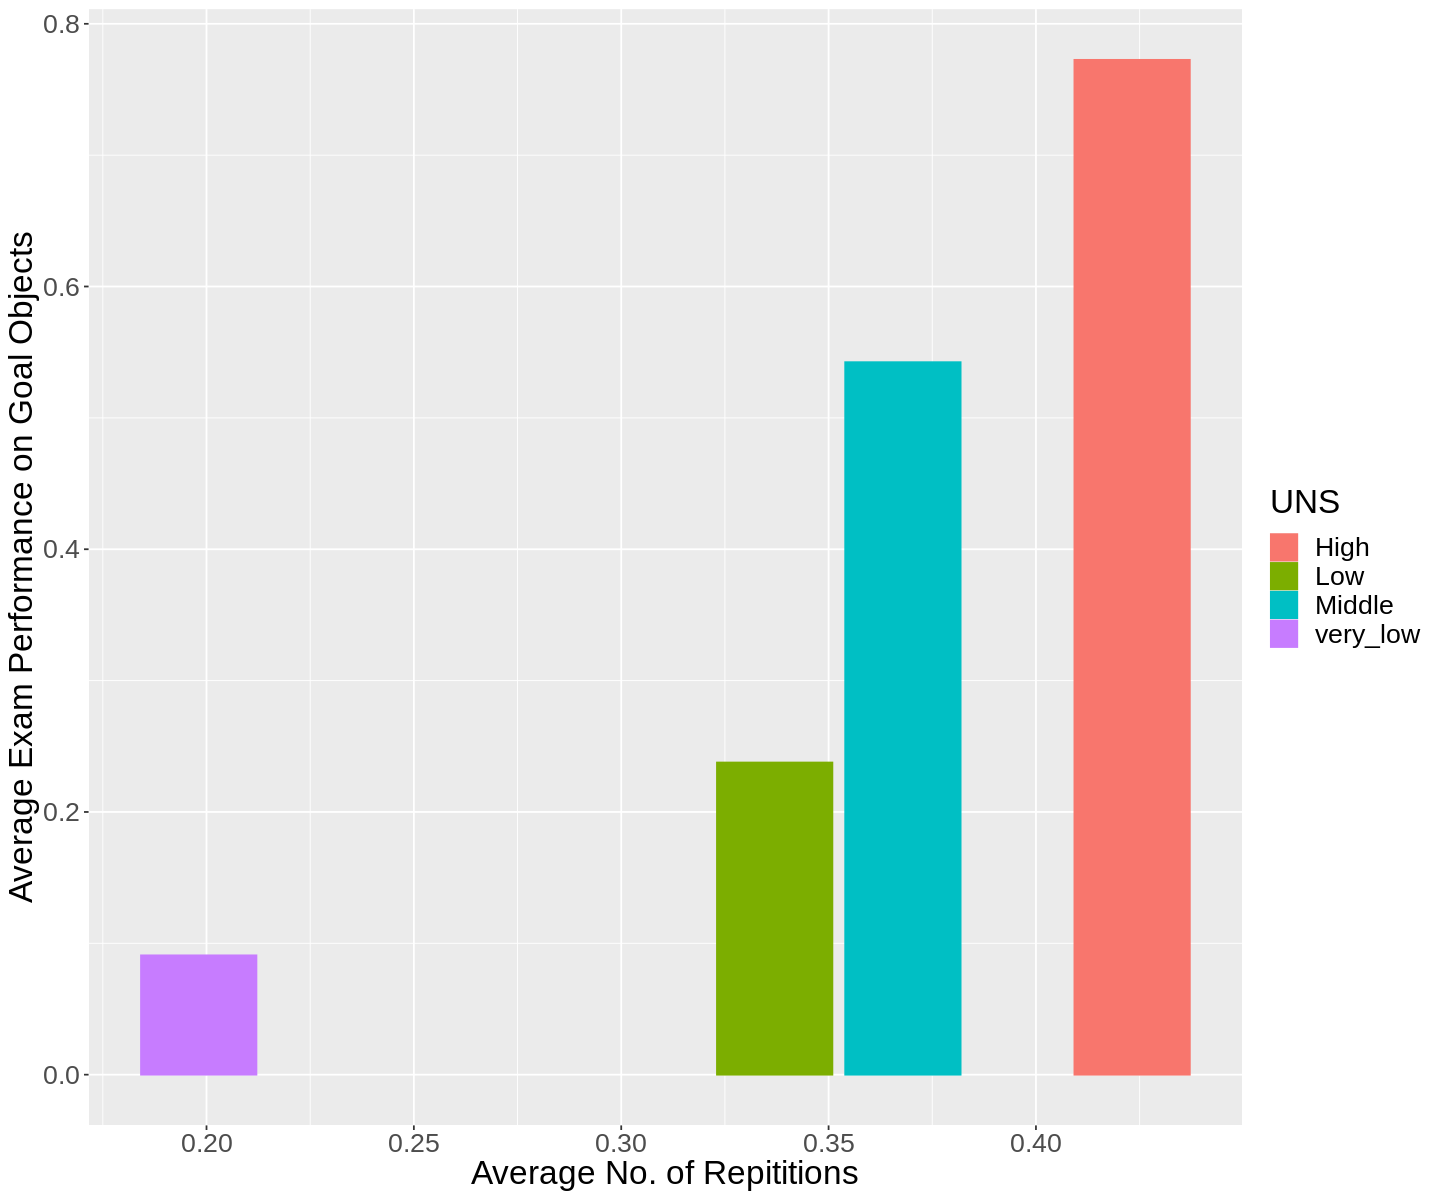

In [26]:
#make a bar chart
mean_know_level_plot <- ggplot(mean_know_level, aes(x = avg_SCG, y = avg_PEG, color = UNS, fill = UNS)) +
geom_bar(stat = "identity") +
labs(x = "Average No. of Repititions", y = "Average Exam Performance on Goal Objects") +
theme(text = element_text(size = 20))

mean_know_level_plot

# —Methods—

### How will we conduct our data analysis?

#### Based on the training set and test set that were already separated for our use, we will do the following steps for data analysis to determine which variables to be used as predictors and finally make a prediction:



- Build a K-nearest neighbors classifier with the training set, the 2 variables that we identified in step 2 as predictors and the knowledge level of goal object as the target variable.

- Predict and classify the knowledge level of the user on the goal object for each observation in the test set.

E.g. If we found out that STR (The degree of study time of user for related objects with goal object) and LPR (The exam performance of user for related objects with goal object) are the major factors that determine the knowledge level on the goal object in step 2, we will serve these as predictors to predict a user’s knowledge level of the goal object. So the significance of our research will be to determine a user’s knowledge level of the goal object from their academic performance.


### Exploratory data analysis: 
#### Creates a visualization of the dataset to:
- Identify which pair of variables together affect the classification of knowledge level on the goal object the most (i.e. has the most obvious pattern)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



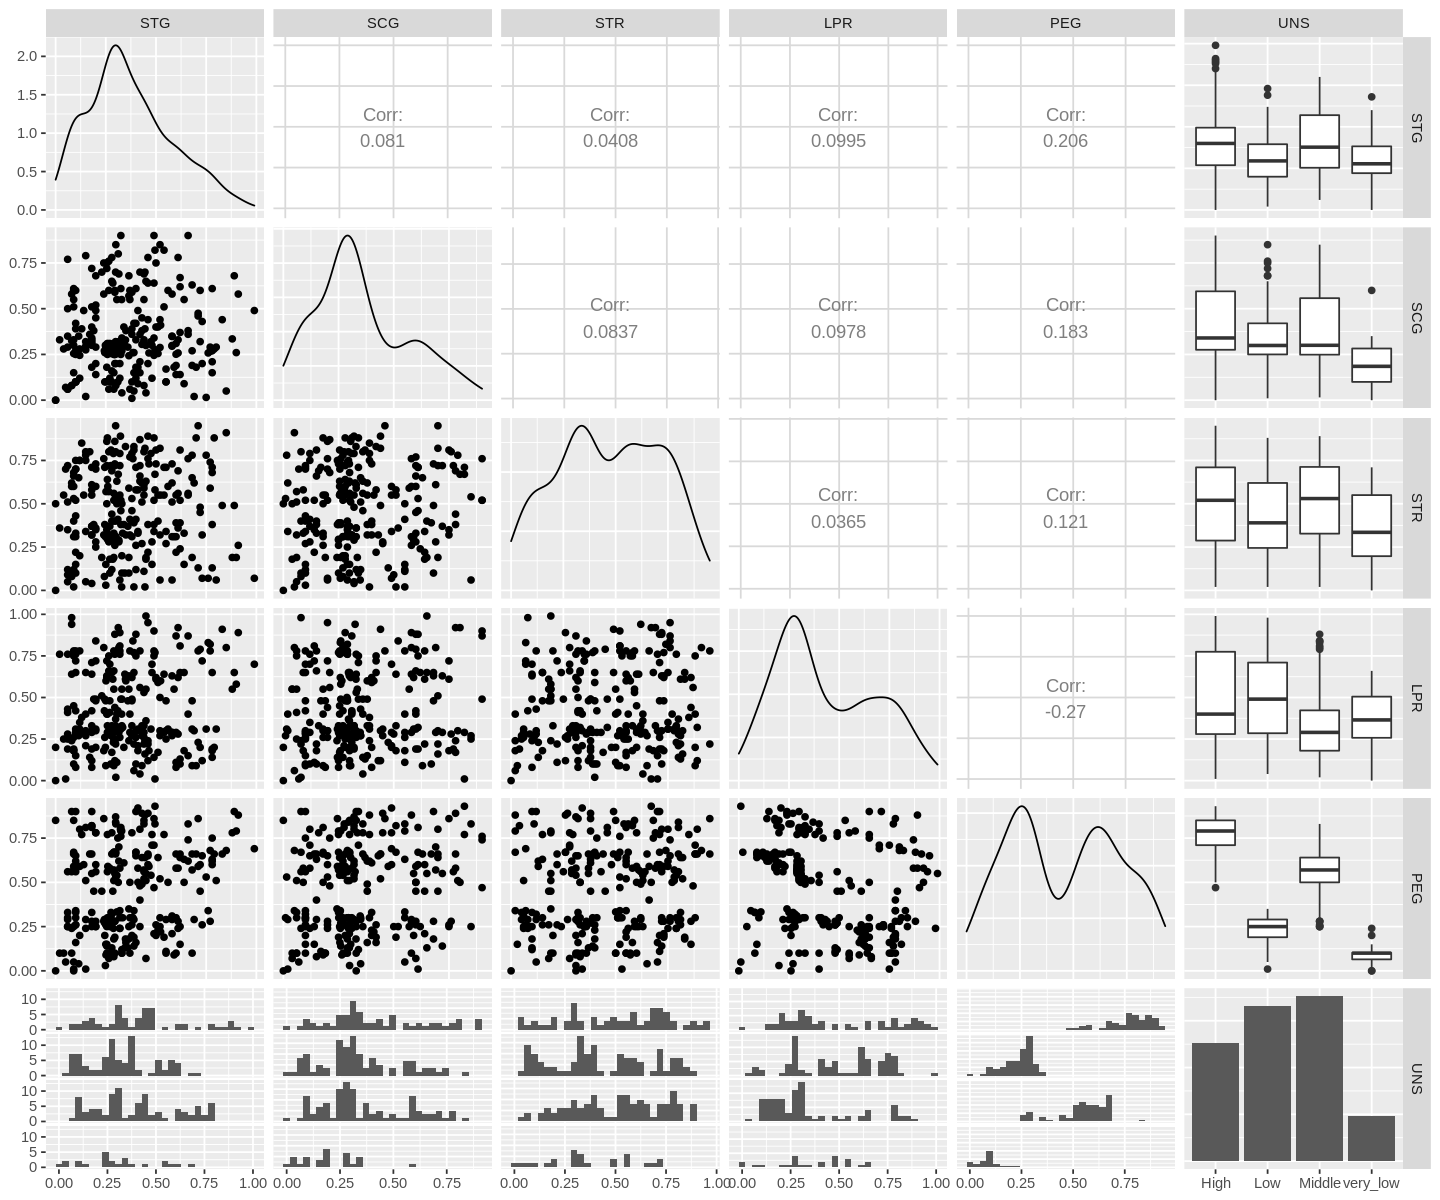

In [27]:
#creat a ggpair plot with all columns
ggpairs(userknowledge_training)

- We first tried to create a scatterplot matrix consisting of scatterplots of each pair of numeric variable using ggpairs. But we can hardly identify a trend/relationship between any one variable and the knowledge level we want to predict (UNS), from the last column of plots. Therefore, we decide to observe the combined effects of any 2 variables.

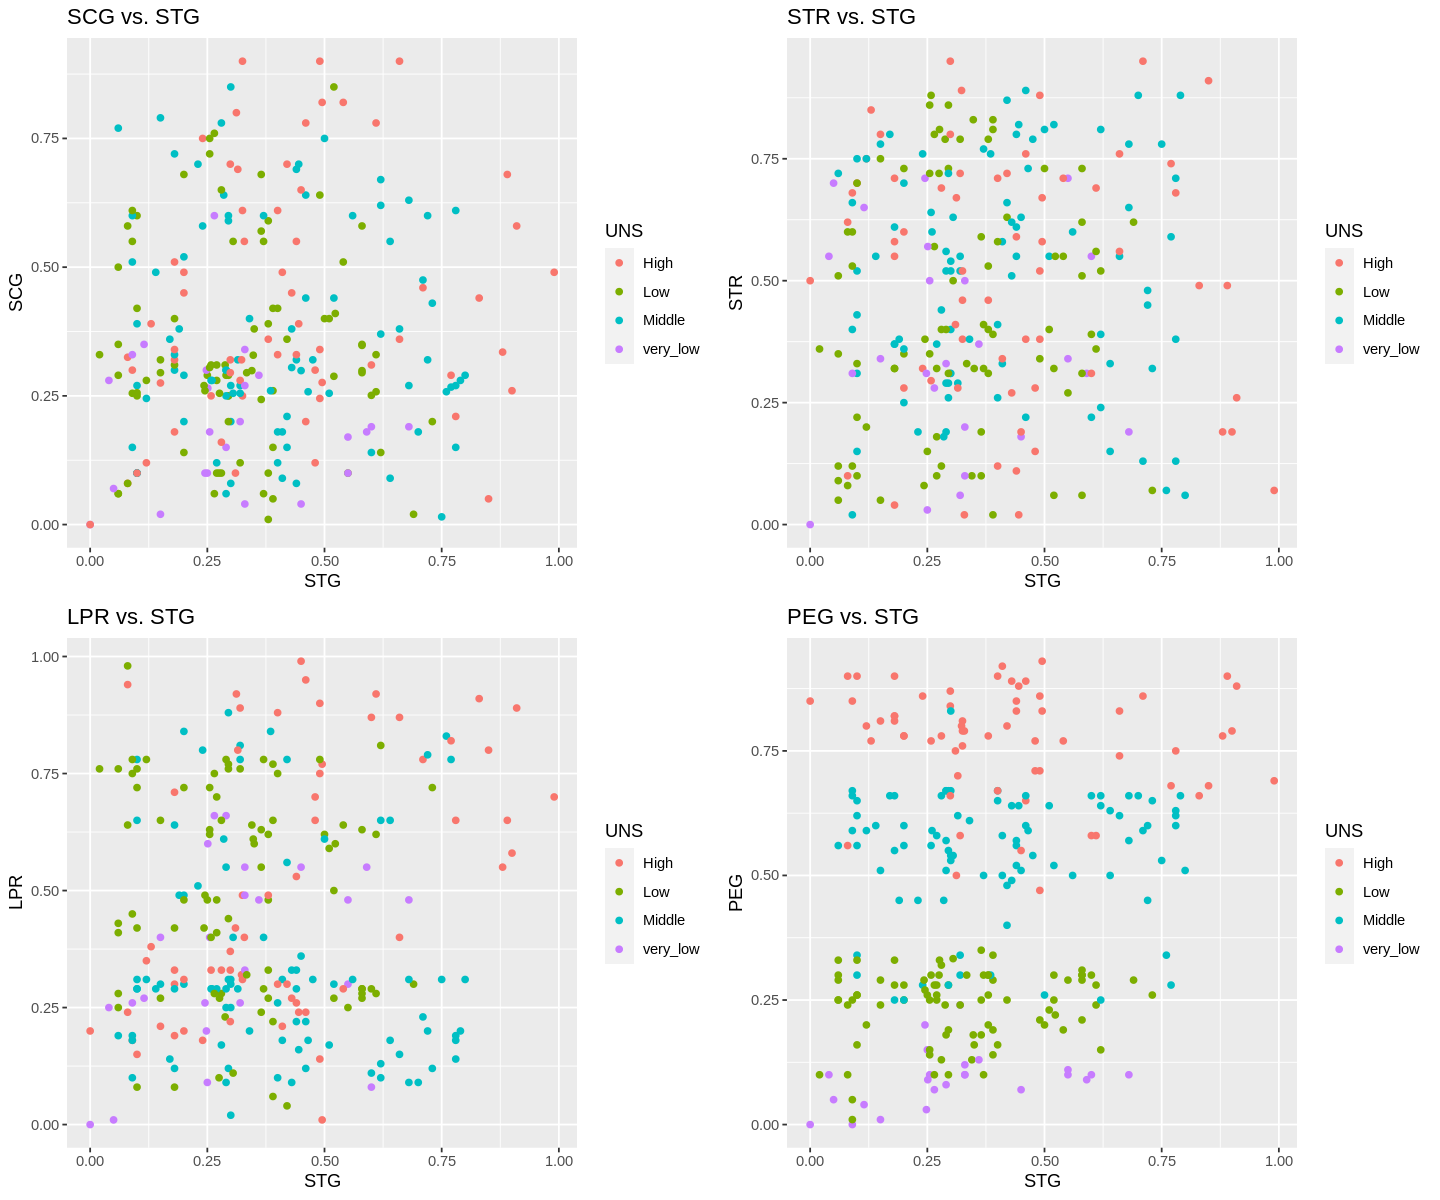

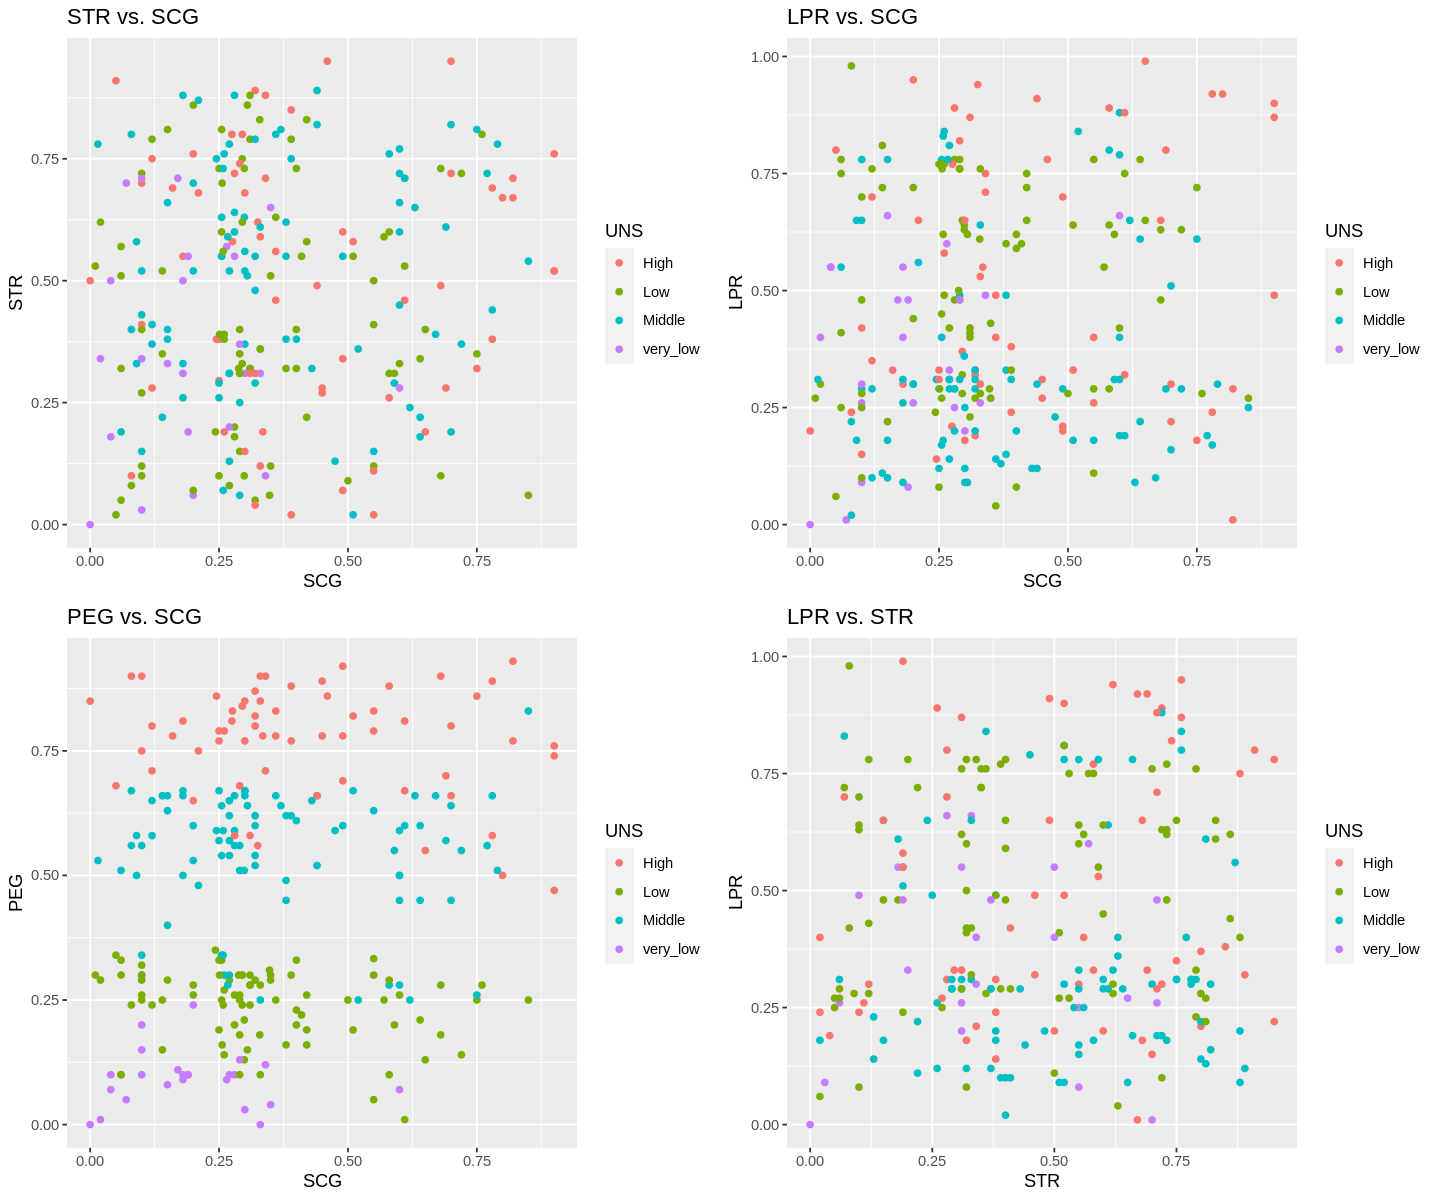

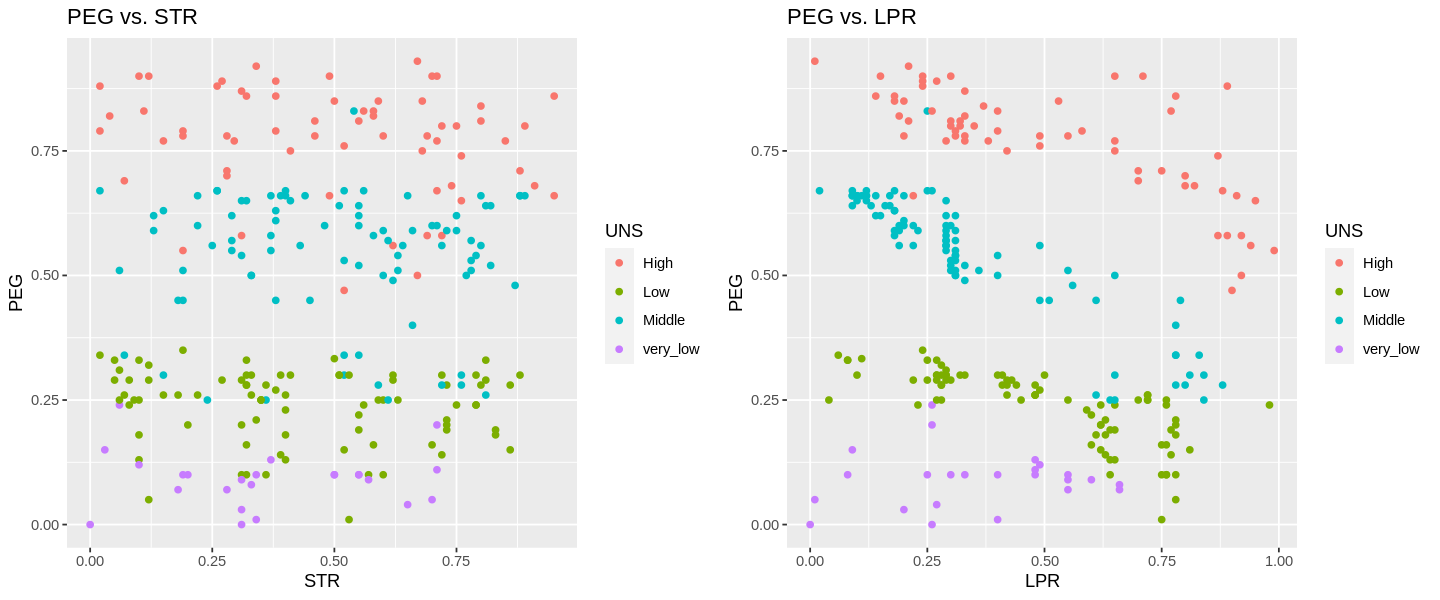

In [28]:
#make scatterplot of each pair of variables
options(repr.plot.width = 12, repr.plot.height = 10)

stg_scg <- ggplot(userknowledge_training, aes(x = STG, y = SCG, color = UNS)) +
    geom_point() +
    ggtitle("SCG vs. STG")

stg_str <- ggplot(userknowledge_training, aes(x = STG, y = STR, color = UNS)) +
    geom_point() +
    ggtitle("STR vs. STG")

stg_lpr <- ggplot(userknowledge_training, aes(x = STG, y = LPR, color = UNS)) +
    geom_point() +
    ggtitle("LPR vs. STG")

stg_peg <- ggplot(userknowledge_training, aes(x = STG, y = PEG, color = UNS)) +
    geom_point() +
    ggtitle("PEG vs. STG")

scg_str <- ggplot(userknowledge_training, aes(x = SCG, y = STR, color = UNS)) +
    geom_point() +
    ggtitle("STR vs. SCG")

scg_lpr <- ggplot(userknowledge_training, aes(x = SCG, y = LPR, color = UNS)) +
    geom_point() +
    ggtitle("LPR vs. SCG")

scg_peg <- ggplot(userknowledge_training, aes(x = SCG, y = PEG, color = UNS)) +
    geom_point() +
    ggtitle("PEG vs. SCG")

str_lpr <- ggplot(userknowledge_training, aes(x = STR, y = LPR, color = UNS)) +
    geom_point() +
    ggtitle("LPR vs. STR")

str_peg <- ggplot(userknowledge_training, aes(x = STR, y = PEG, color = UNS)) +
    geom_point() +
    ggtitle("PEG vs. STR")

lpr_peg <- ggplot(userknowledge_training, aes(x = LPR, y = PEG, color = UNS)) +
    geom_point() +
    ggtitle("PEG vs. LPR")

plot_grid(stg_scg, stg_str, stg_lpr, stg_peg, ncol = 2)
plot_grid(scg_str, scg_lpr, scg_peg, str_lpr, ncol = 2)
options(repr.plot.width = 12, repr.plot.height = 5)
plot_grid(str_peg, lpr_peg, ncol = 2)

#### How will we visualize our results?

- We use scatter plots to visualize our data analysis and results. The two predictors (or each pair of 2 variables) are on the x and y axes and our target variable of classification will be the color label, so as to observe and explore how the two chosen variables together affect the classification of knowledge level of the goal object.

- We identified that the pair of variables PEG vs. LPR relates to the classification of target variable - knowledge level the most, so we set them as the predictors.

### Data analysis & Prediction Model

#### 1. Create a model with 2 variables
Build a K-nearest neighbors classifier using the training set, the 2 variables that we identified (PEG & LPR) in step 2 as predictors and the knowledge level of goal object (UNS) as the target variable.

##### Using cross validation to determine the number of neighbors

In [29]:
#create a model specification for K-nearest neighbors classification
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>% 
    set_engine("kknn") %>%
    set_mode("classification")

#create a recipe for training data with PEG and LPR
user_recipe <- recipe(UNS ~ PEG + LPR, data = userknowledge_training) %>% 
    step_scale(all_predictors()) %>% 
    step_center(all_predictors())

#create a data frame with a neighbors variable that contains the sequence of values of K to try
k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5)) 

#make 5-fold cross-validation
user_vfold <- vfold_cv(userknowledge_training, v = 5, strata = UNS) 

# fit the knn model
knn_results <- workflow() %>% 
    add_recipe(user_recipe) %>% 
    add_model(knn_spec) %>% 
    tune_grid(resamples = user_vfold, grid = k_vals) %>% 
    collect_metrics() 

#find the optimal k
best_k <- knn_results %>% 
    filter(.metric == "accuracy") %>%
    filter(mean == max(mean)) 
best_k

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
6,accuracy,multiclass,0.9571495,5,0.01454643,Model02


##### Train the model with best K

In [30]:
#pull the optimal k value
best_neighbor <- best_k %>%
    select(neighbors) %>%
    pull()

#recreate the standardization recipe with optimal k
best_knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_neighbor) %>% 
    set_engine("kknn") %>% 
    set_mode("classification")

#fit the knn model with optimal k
k_flow <- workflow() %>% 
    add_recipe(user_recipe) %>% 
    add_model(best_knn_spec) %>% 
    fit(data = userknowledge_training)

k_flow

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = ~best_neighbor,     kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.0503876
Best kernel: rectangular
Best k: 6

##### To test our model, we decided to use an example student to make a prediction of their knowledge score. To do this, we inputted a new observation and classified it by calling the predict function:

In [31]:
#predict new observation
new_obs <- tibble(PEG = 0.50, LPR = 0.50)
predict(k_flow, new_obs)

.pred_class
<fct>
Middle


#### 2. Create a model with all 5 variables
##### Cross validation to determine K (using the same training/validation split as when working with 2 variables to make the results comparative)

In [32]:
#create a recipe for training data with all 5 variables
recipe_all <- recipe(UNS ~ ., data = userknowledge_training) %>% 
    step_scale(all_predictors()) %>% 
    step_center(all_predictors())

#fit the knn model
knn_results_all <- workflow() %>% 
    add_recipe(recipe_all) %>% 
    add_model(knn_spec) %>% 
    tune_grid(resamples = user_vfold, grid = k_vals) %>% 
    collect_metrics() 

#find the optimal k
best_k_all <- knn_results_all %>% 
    filter(.metric == "accuracy") %>%
    filter(mean == max(mean)) 

best_k_all

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
6,accuracy,multiclass,0.7940528,5,0.0173515,Model02


- We got the same number for the best K (number of neighbors) to use in the prediction model, although we use 5 variables here vs. 2 variables used in the previous model.

- The estimated accuracy for the prediction model with 5 variables is 0.79, compared to that with 2 variables, 0.96. We may say that the knowledge level (UNS) is better predicted with only 2 variables (PEG & LPR) which have the closest relationship with it, merely from results obtained here.

##### Train the model with best K

In [33]:
#pull the optimal k value
best_neighbor_all <- best_k_all %>%
    select(neighbors) %>%
    pull()

#recreate the standardization recipe with optimal k
best_knn_spec_all <- nearest_neighbor(weight_func = "rectangular", neighbors = best_neighbor_all) %>% 
    set_engine("kknn") %>% 
    set_mode("classification")

#fit the knn model with optimal k
k_flow <- workflow() %>% 
    add_recipe(recipe_all) %>% 
    add_model(best_knn_spec_all) %>% 
    fit(data = userknowledge_training)

k_flow

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = ~best_neighbor_all,     kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.1976744
Best kernel: rectangular
Best k: 6

##### To test our model, we decided to use an example student to make a prediction of their knowledge score. To do this, we inputted a new observation and classified it by calling the predict function:

In [34]:
#predict new observation
new_obs <- tibble(STG = 0.16, SCG = 0.16, STR = 0.80, PEG = 0.50, LPR = 0.50)
predict(k_flow, new_obs)

.pred_class
<fct>
Middle


### Dicussion


During the analysis of the User Knowledge Modeling Data Set our team discovered that the most suitable pair of predictors to use to determine the knowledge level (UNS) of a student are firstly, the exam performance of user for goal objects (PEG) and secondly, the exam performance of a user for related objects with goal object (LPR). You may be wondering, why did we choose to evaluate the student’s knowledge level using two variables rather than one or three, or maybe even all four variables provided in the data set? The reason lies in the purpose of our data analysis. We want to guide university students in the tricky decision of where to effectively spend their limited time and energy while earning their degree. If we want students to be able to implement new methods of delegating their study time into their lives, it would not make sense for our team to suggest all four determinants of student knowledge level. We built a k_flow model twice, once using all variables as predictors and then a second model using only the two best predictors. As you can see in the new observation prediction for our test student, both models were able to accurately predict the same output (middle). From our findings that spending more focusing on the exam in the goal subject as well as spending more time focusing on exams for related subjects then it becomes clear to the student that this is where they need to spend their time and energy to be a successful yet effective student. 

The main test we are interested in is the one built with two variables as predictors (as mentionned earlier). To do this, we input randomly selected exam scores of a hypothetical student into a new observation. These values chosen were: LPR = 0.50, PEG = 0.50. This outputs an assigned knowledge level score (UNS) of “Middle”. We can see here that when the student has a PEG score of: 0.50/1 = 50% and an LPR score of: 0.50/1 = 50%, they have a low knowledge level of the goal subject - which in this case is the primary subject of Electrical DC Machines. In our proposal, we stated our original estimates as to which variables would be the best predictors of user knowledge level. It was expected that we would find a correlation between the STG variable and UNS knowledge level score, as well as another positive relationship between the PEG variable and the UNS knowledge score. As discussed earlier, the variables that were in fact the best predictors were PEG and LPR, half of our prediction matched what actually occurred. This goes to show that exam scores of related subjects to the primary subject (LPR) may be more important for a student’s knowledge level than the degree of study time for the goal subject (STG). 

These findings could have a potentially useful impact on not only the academic success of a student but also student mental health. As seen in the study introduced prior to the analysis, more efficient students are healthier students. With this data-backed proof that exam scores are the largest indicator of knowledge level of a student, they may be able to allocate their energy on preparing for exams specifically rather than wasting their time stressing over filler class activities or homework. If students are able to plan their time accordingly into a studying format that allows them to obtain the best knowledge of their goal topic as possible they have the potential to become highly efficient learners. Furthermore, it has been stated that: “Learning is often considered complete when a student can produce the correct answer to a question” (Karpicke et al., 2008). A study published in Science, titled The Critical Importance of Retrieval for Learning concluded that examinations are the most accurate method to determine a student’s knowledge level of a subject. This confirms the results we found as well as shows that we made a good decision when choosing the plot that showed the strongest relationship between two variables and UNS score. We can see this when the study shares: “The experiment also shows a striking absence of any benefit of repeated studying once an item could be recalled from memory. A basic tenet of human learning and memory research is that repetition of material improves its retention”. (Karpicke et al., 2008). We found in our data analysis that increased study time of the goal subject or related subjects is a stronger indicator of knowledge level, this result agrees directly with those of the study. 

Looking forward, this analysis could lead to further research surrounding concepts such as; what are the variables with the largest impact on determining acceptance rate to a specific program or school? Another study could also use similar methods to determine what are the strongest indicators of a successful professor/teacher? All in all, this analysis could provide the opportunity for students and educators to rethink their methods and ultimately create an improved education system for all.

#### References (APA)

   Galbraith, C. S., & Merrill, G. B. (2014). Academic performance and burnout: An efficient frontier analysis of resource use efficiency among employed university students. Journal of Further and Higher Education, 39(2), 255–277. https://doi.org/10.1080/0309877x.2013.858673

   Karpicke, J. D., & Roediger, H. L. (2008). The critical importance of retrieval for learning. Science, 319(5865), 966–968. https://doi.org/10.1126/science.1152408